# World Happiness Report

## Context
The World Happiness Report is a landmark survey of the state of global happiness. 
The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update.
The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations
at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition 
as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.
Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and 
more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review
the state of happiness in the world today and show how the new science of happiness explains personal and national variations
in happiness.

## Content
The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life 
evaluation question asked in the poll. This question, known as the Cantril ladder, asks respondents to think of a ladder 
with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives 
on that scale. The scores are from nationally representative samples for the years 2013-2016 and use the Gallup weights to 
make the estimates representative. The columns following the happiness score estimate the extent to which each of six 
factors– economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute
to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal 
to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for 
each country, but they do explain why some countries rank higher than others.

## Features Explanation :

Happiness Rank: Rank of any country in a particular year.

Country: Name of the country.

Standard Error: The standard error of the happiness score.

Happiness Score: Happiness score as the sum of all numerical columns in the datasets.

Economy (GDP per Capita): The extent to which GDP contributes to the calculation of the Happiness score

Trust: A quantification of the people’s perceived trust in their governments.

Health (Life Expectancy): The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Generosity: Numerical value estimated based on the perception of Generosity experienced by poll takers in their country.

Family Support: Metric estimating satisfaction of people with their friends and family.

Freedom: Perception of freedom quantified.

Dystopia: Hypothetically the saddest country in the world.

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset into Notebook

data = pd.read_csv(r"C:\Users\hp\Desktop\World_Happiness_report.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
#Checking for missing values and Nan

data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [4]:
#As we can see there is no null values
#Checking data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
#Checking shape of Dataset

data.shape

(158, 12)

In [7]:
#Checking Statistics

data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


<AxesSubplot:>

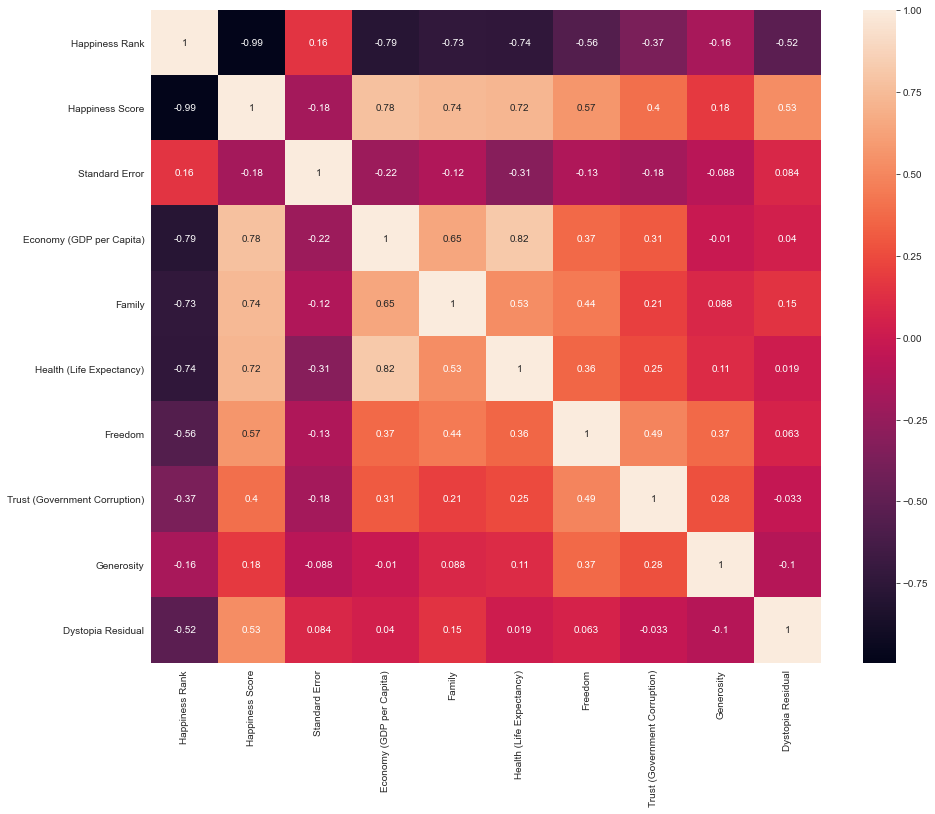

In [9]:
#Checking Correlation between variables

sns.set_style("darkgrid")
plt.figure(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr, annot=True)

 From above heatmap it is clear that columns 'Economy , Family and Health' contribute most in Happiness score

In [10]:
#Dropping coloumns which are not necessary for prediction

data.drop([ 'Country' , 'Region' ] , axis=1 , inplace=True)

In [11]:
data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


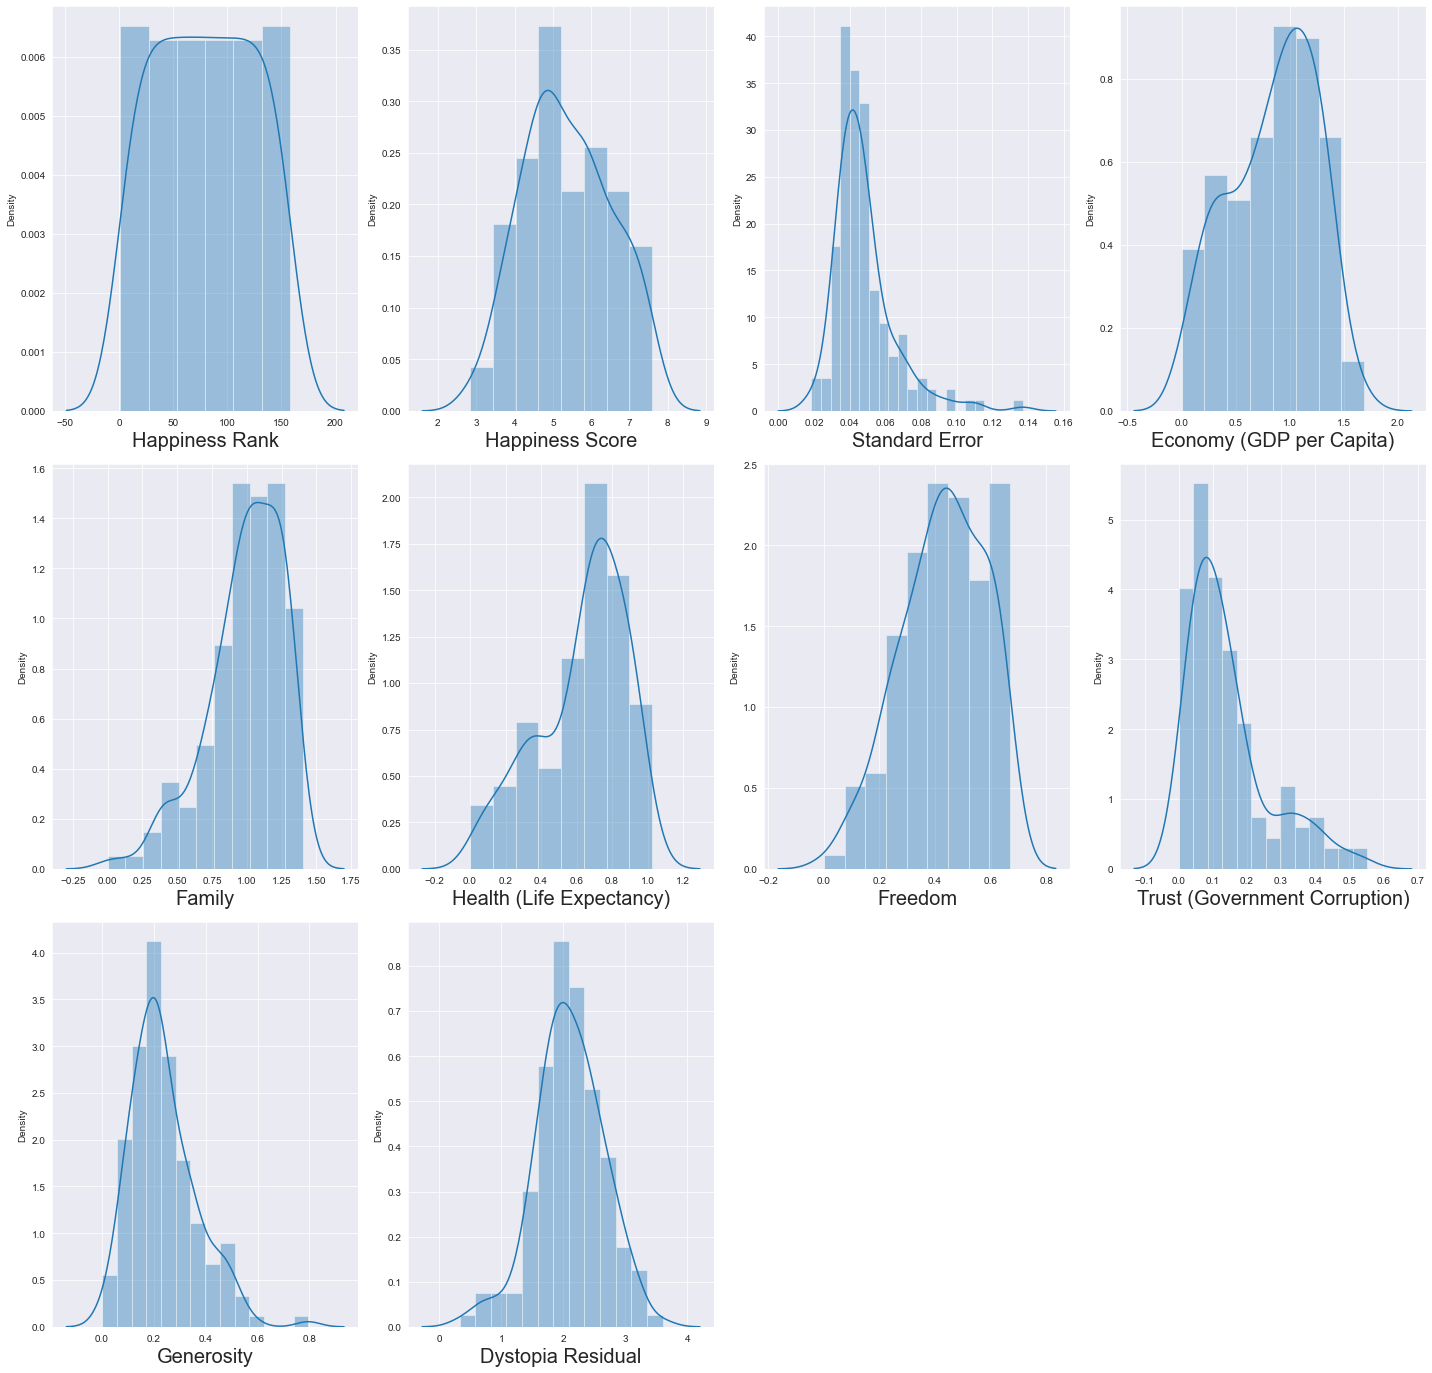

In [12]:
#Let's check how data is distributed for every coloumn


plt.figure(figsize=(20,25))

plotnumber=1

for column in data:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [13]:
#As above distribution looks fine let's move ahead
#Let's check relationship between features and labels

x = data.drop(columns=['Happiness Score','Happiness Rank'])
y = data['Happiness Score']

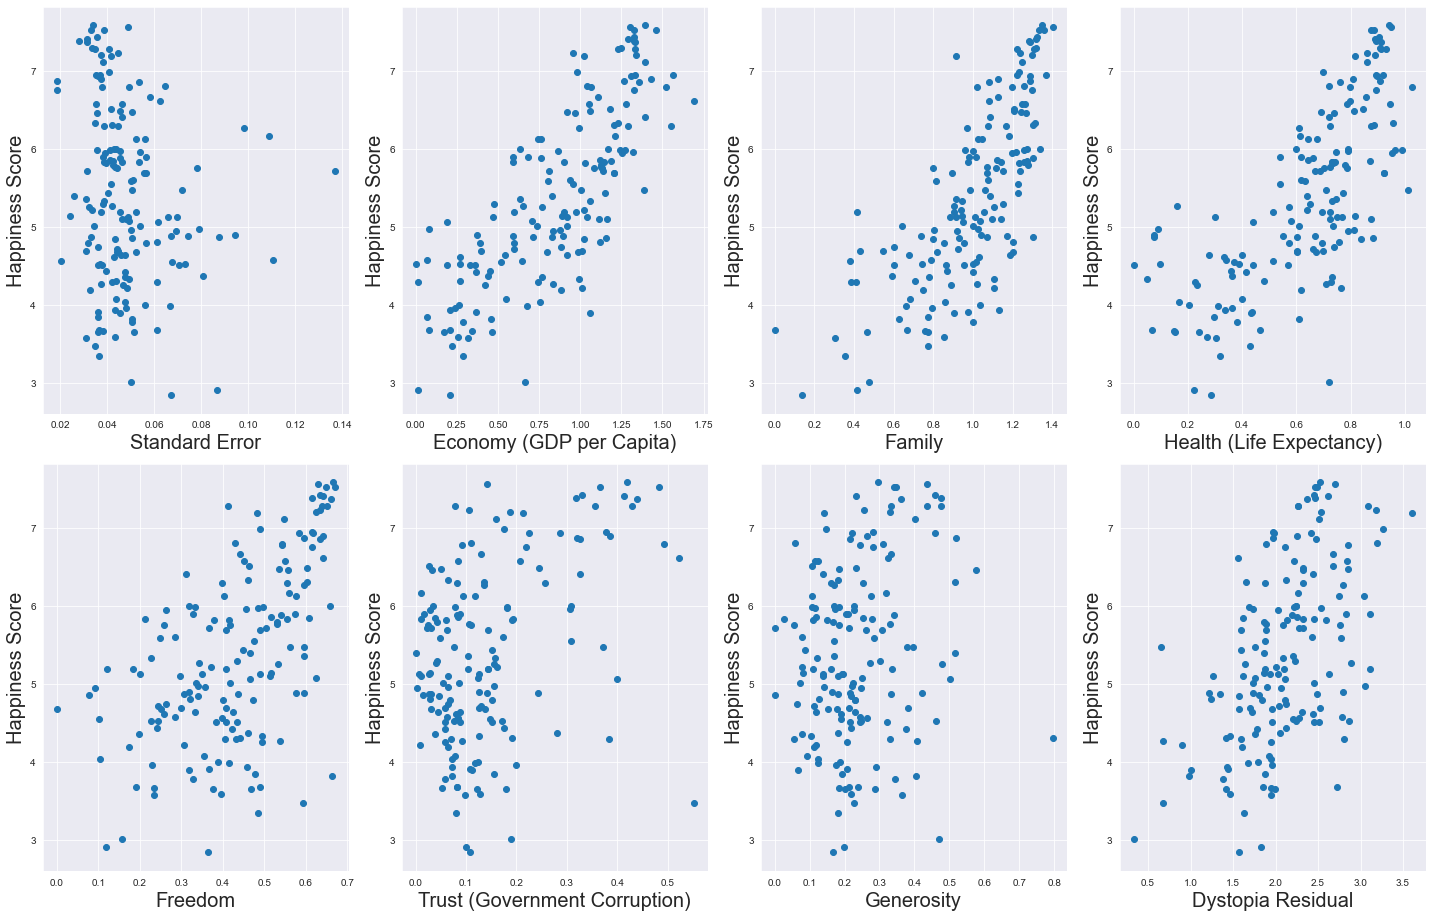

In [14]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in x:
    if plotnumber<=16 : 
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel('Happiness Score', fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [15]:
#Scaling Data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

In [16]:
#This is how the X_scaled data looks like

X_scaled

array([[-0.80592569,  1.36962124,  1.32028142, ...,  2.30965159,
         0.47103971,  0.75825809],
       [ 0.05588945,  1.13522625,  1.51445776, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-0.8544869 ,  1.19286069,  1.36105403, ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 0.13253425, -0.45524543, -1.90108634, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 2.26396166, -2.06756644, -2.1184666 , ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.13418227, -1.58633379, -3.13472485, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

In [17]:
#Splitting data into training and testing

x_train,x_test,y_train,y_test = train_test_split(X_scaled , y , test_size=0.25 , random_state=160)

In [18]:
y_train.head()

8      7.286
155    3.006
83     5.140
93     4.971
56     5.828
Name: Happiness Score, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#MODEL INSTATIATION AND TRAINING

# HERE WE USE LINEAR REGRESSION

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
#Predict Happiness Score by given Features :

print ('Happines Score : ' ,regression.predict(scalar.transform([[0.03,1.39,1.34,0.94,0.66,0.41,0.29,2.51]])))

Happines Score :  [7.53989711]


 Above, we can give input according to data received and our model will be able to precdict 'Happiness Score'

In [23]:
#Adjusted R2 Score #Checking Model Confidence

regression.score(x_train,y_train)

0.9999999400670961

In [26]:
#Checking how well model fits testing data

regression.score(x_test,y_test)


0.9999999438784818

In [27]:
#Let's Plot and Visualize

y_pred = regression.predict(x_test)

In [28]:
y_pred

array([5.36028913, 5.97521517, 6.85291859, 3.89647991, 4.78644764,
       4.87600974, 5.12313045, 6.66968152, 7.28397061, 5.12419055,
       6.75013083, 4.35000032, 3.9037549 , 4.64227873, 6.26923555,
       6.61120112, 4.41930932, 5.95960641, 6.47677694, 3.81926551,
       5.69528971, 6.94616759, 7.58685089, 7.40598176, 6.81019195,
       4.71477746, 6.0026795 , 6.29475376, 6.16768239, 5.82413194,
       3.9308034 , 5.28636251, 4.68073446, 3.67788985, 5.87831602,
       6.94021021, 5.71586379, 5.81249244, 4.88446693, 3.46481228])

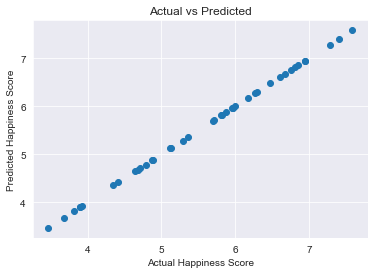

In [29]:
# ploting graph between actual and predicted happiness score

plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Actual vs Predicted')
plt.show()

In [32]:
#Model Evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [33]:
y_pred = regression.predict(x_test)

In [34]:
mean_absolute_error(y_test,y_pred)

0.00023390081309716538

In [35]:
mean_squared_error(y_test,y_pred)

7.098802356802132e-08

In [36]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002664357775675431

In [37]:
#Let's check whether or model is overfitting or Underfitting using Regularization Techniques

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lassocv = LassoCV(alphas = None , max_iter=1000 , normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [38]:
alpha = lassocv.alpha_
alpha

8.080182496873452e-05

In [39]:
#Now that we have the best parameter , let's use Lasso Regression and see how well our
#data fitted before

lass_reg = Lasso(alpha)
lass_reg.fit(x_train,y_train)

Lasso(alpha=8.080182496873452e-05)

In [40]:
lass_reg.score(x_test,y_test)

0.9999999238276395

In [41]:
#Checking for Ridge
ridge_cv = RidgeCV(alphas = np.arange(0.1,1.0,10.0), normalize = True)
ridge_cv.fit(x_train,y_train)
ridge_model = Ridge(alpha=ridge_cv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [42]:
ridge_model.score(x_test,y_test)

0.9999993683822643

##### HENCE ,  OUR MODEL LOOKS COMPLETELY FINE THERE IS NO OVERFITTING/UNDERFITTING OF DATA